In [2]:
import numpy as np
import pandas as pd
from os.path import join, dirname, isfile, basename
from os import getcwd, listdir
import matplotlib.pyplot as plt

In [3]:
import sys
if 'jupyterthemes' in sys.modules:
    from jupyterthemes import jtplot
    jtplot.style()

In [4]:
base_path = dirname(getcwd())
data_path = join(join(base_path, 'mapping'), 'all_data.csv')
all_data = pd.read_csv(data_path).drop('Unnamed: 0', axis=1)

In [5]:
from sklearn.cluster import AgglomerativeClustering


In [10]:
non_spatial_data = all_data.drop(['easting', 'northing'], axis=1)

,Poisson's ratio,permeability,porosity,Young's Modulus,oil saturation,water saturation
0,0.34415,0.013715,0.060762,1.137784e+07,1.000000,0.000000
1,0.34415,0.013715,0.060762,1.137784e+07,1.000000,0.000000
2,0.34415,0.013715,0.060762,1.137784e+07,1.000000,0.000000
3,0.34415,0.013715,0.060762,1.137784e+07,1.000000,0.000000
4,0.34415,0.015351,0.060762,1.137784e+07,1.000000,0.000000
...,...,...,...,...,...,...
889244,0.31358,0.002019,0.021611,7.672472e+06,0.782713,0.218789
889245,0.31358,0.002019,0.021611,7.672472e+06,0.782713,0.218789
889246,0.31358,0.002019,0.021611,7.672472e+06,0.782713,0.218789
889247,0.31358,0.002019,0.021611,7.672472e+06,0.782713,0.218789


In [12]:
num_samples = 40000

In [13]:
non_spatial_train = non_spatial_data.sample(n=num_samples)

In [14]:
samples = all_data.sample(n=num_samples)

In [15]:
non_spatial_model = AgglomerativeClustering(linkage='ward', n_clusters = 12)
non_spatial_model.fit(non_spatial_train)

AgglomerativeClustering(n_clusters=12)

In [16]:
model = AgglomerativeClustering(linkage='ward', n_clusters = 12)
labels = model.fit_predict(samples.drop(['easting', 'northing'], axis=1))

In [17]:
max(labels)

11

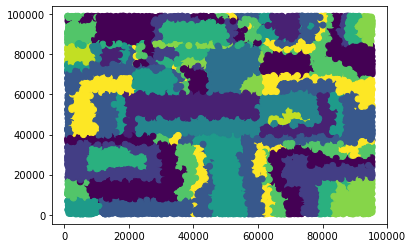

In [18]:
plt.figure()
plt.scatter(samples['easting'], samples['northing'], c=labels)

In [24]:
spatial_model = AgglomerativeClustering(linkage='ward', n_clusters = 12)
spatial_labels = model.fit_predict(samples)

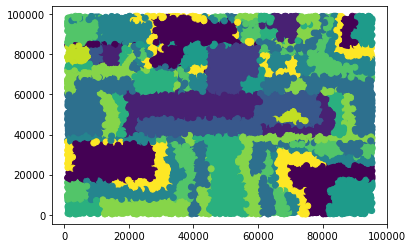

In [25]:
plt.figure()
plt.scatter(samples['easting'], samples['northing'], c=spatial_labels)

In [19]:
more_precise = AgglomerativeClustering(linkage='ward', n_clusters = 24)
more_precise_labels = more_precise.fit_predict(samples.drop(['easting', 'northing'], axis=1))

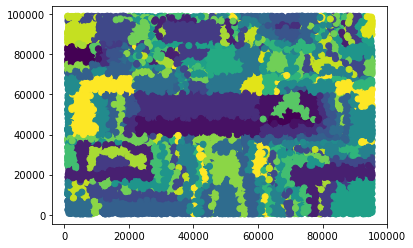

In [20]:
plt.figure()
plt.scatter(samples['easting'], samples['northing'], c=more_precise_labels)